# Ken Anderson 

## Research question/interests

What airlines are the best and what are the worst at being on-time, cancelled, and customer satisfaction?
## Research questions:
- **Also through the other observations we find that american arlines even though they are the highest rated airline we find that they are the worst in most of out data, as they seem to be the best as being late, however due to the ammount of planes that american has flying per day is more than most of the other airlines that alos accounts for this. so a new research question is, within the mean/ average of the airlines what airline is the worst on basis of how many aircraft total they have, thus more airplanes they have the less one delay means as per a value. so if your fleet is smaller a delayed flight would be more substatial. thus is this statment true or does more airplanes within a fleet have a higher likely hood to fail due to the masses.**

- **also an interesting topic is the idea of basis of location are some areas more susetable to delays, persay in the winter is one region of the coast or state more sucetpable to a delay than that of a airport in arizona where the weather is great for the most part. compared to a state like wisconsin in the winter or idaho where the winter months will see more delays**

#### Follow up questions/observations

- so we find that 17 percent of security delays are held by spirit airlines. which is quite substantial when their numbers are 38737 delays per year on average. also a question I have that is out of scope is: does this account for late arrival also? or once it is classified as a security delay is it just that.?

- ["Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.]("https://aspm.faa.gov/aspmhelp/index/Types_of_Delay.html#:~:text=Security%20delay%20is%20caused%20by,29%20minutes%20at%20screening%20areas.so") this inforamtion is important for spirit with their security delays, I also read that overworking their workers and them being over their hours results in a security delay, this is quite substatial as we know spirit is a budget airline that boards with buses from the terminals as buying gates is expensive, so we can see the connection to the security delays with spirit as their boarding process isnt as seamless as it could be]

- although american airlines has a substantal fleet, is 140,000 late aircraft delays really acceptable for its fleet size, that is 11666.6666667 late aircraft per month, thats a lot of delays

- also its a shame this data doesnt show flowing flights like when a flight is delayed usually all of the rest of that airplanes flights for the day are delayed unless of some lucky tailwind that gets them back on time. this domino effect could be the cause of such high numbers with american airlines as american does usually shorter haul flights 2.5-6 hours usually from state to state cross country flights so the likelyhood that american sees more dominoe effect delays may be more likely as they do more smaller short haul flights in a day. 

- As for the airlines like Hawaian that tend to to either some short haul flights from island to island, for the most part they are doing some flights from the mainland to the islands thus these are really only 2 flights in 24hours as they go to mainland then back to the island, thus it makes sense that there are less delays and late aircarft delays due to the smaller amount of flights per day. 


### Following is the airline codes 
|#| Code | Airline |
|-----:|:------|:--------------|
|1|9E| Endeavor Air Inc.|
|2|AA| American Airlines Inc. |
|3|AS| Alaska Airlines Inc.|
|4|B6| JetBlue Airways|
|5|DL| Delta Air Lines Inc.|
|6|EV| ExpressJet Airlines Inc.|
|7|F9| Frontier Airlines Inc.|
|8|G4| Allegiant Air|
|9|HA| Hawaiian Airlines Inc.|
|10|MQ| Envoy Air|
|11|NK| Spirit Air Lines|
|12|OH| PSA Airlines Inc.|
|13|OO| SkyWest Airlines Inc.|
|14|QX| Horizon Air|
|15|UA| United Airlines Inc.|
|16|WN| Southwest Airlines Co.|
|17|YV|Mesa Airlines Inc.|
|18|YX|Republic Airline|

### Definitions:
#### Carrier delay:
##### These delays are in control of the carrier, aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection,, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry on baggage, weight and balance delays.
#### Late arrival delay:
##### Arrival delays at an airport due to the late arrival of the same aircraft at a previous airport, the ripple effect of an earlier delay at downstream airports is referred to as delay propagation.
#### NAS delay:
##### Delays that are within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc. Delays that occur after Actual Gate Out are usually attributed to the NAS and are also reported through OPSNET
#### Weather Delay:
##### Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.
#### OPSNET Delay Cause:
##### Delays to Instrument Flight Rules (IFR) traffic of 15 minutes or more, experienced by individual flights, which result from the ATC system detaining an aircraft at the gate, short of the runway, on the runway, on a taxiway, and/or in a holding configuration anywhere en route.


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
#sample_data = pd.read_csv('airline.csv')
airlineDatajan2021Dec2021 = pd.read_csv('../data/raw/Airline_Data_Jan2021-Dec2021.csv')
#we can changes this file above just ensure naming is somewhat descriptive cause this could get messy

In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from analysis.code import project_functions_ken as p1

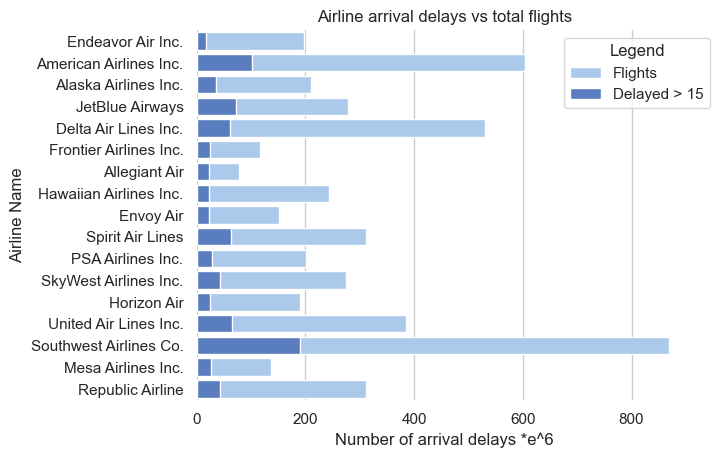

In [4]:

df1 = p1.processed_Without_Time("../data/raw/airline_data_filtered.csv")
#df1 = airlineDatajan2021Dec2021
sns.set_theme(style = "whitegrid")
sns.set_color_codes("pastel")
sns.barplot(data = df1, y = 'carrier_name',x = 'arr_flights', color = "b", errorbar=None).set(xlabel = "Number of arrival delays *e^6", title = "Airline arrival delays vs total flights",ylabel = "Airline Name")
sns.set_color_codes("muted")
sns.barplot(data = df1, y = 'carrier_name',x = 'arr_del15', color = "b",errorbar=None).set(xlabel = "Number of arrival delays *e^6",title = "Airline arrival delays vs total flights",ylabel = "Airline Name")
sns.despine(left= True, bottom = True)
labels = ['Flights', 'Delayed > 15']
plt.legend(labels, title = "Legend",bbox_to_anchor = (1.05,1), loc = "best")

##### Looks like Southwest takes the cake here on being the worst airline, for the most part they are lightyears ahead of the competition in being the worst. american airlines with a comparable fleet size out shines Southwest as Southwest seems to have many more delays and cancellations
#### Who is the best?
##### Looks like Over the board American Airlines is the best, because American airlines have such a robust fleet and route network, they are able to offset the effect of delays and cancellations compared to smaller airlines.


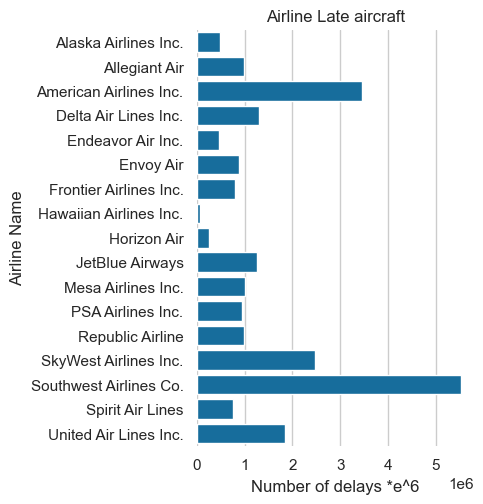

In [6]:
df2 = p1.processed_Without_Time("../data/raw/airline_data_filtered.csv")
#df2 = airlineDatajan2021Dec2021
df2 = df2.groupby('carrier_name')['late_aircraft_delay'].sum().reset_index()
sns.set_theme(style = "whitegrid")
sns.set_color_codes("colorblind")
#sns.barplot(data = airlineDatajan2021Dec2021, y = 'carrier_name',x = 'arr_flights', color = "b", errorbar=None).set(xlabel = "Number of arrival delays *e^6", title = "Airline arrival delays vs total flights",ylabel = "Airline Name")
#sns.set_color_codes("muted")
sns.catplot(data = df2, y = 'carrier_name',x = 'late_aircraft_delay', kind = "bar",color = "b",errorbar=None).set(xlabel = "Number of delays *e^6",title = "Airline Late aircraft",ylabel = "Airline Name")
sns.despine(left= True, bottom = True)
labels = ['Flights', 'Late Aircraft delays']
#plt.legend(labels, title = "Legend",bbox_to_anchor = (1,1), loc = "best")

[Text(0.5, 0, 'Number of Diverted flights'),
 Text(0.5, 1.0, 'Number Of Diverted Flights pre Airline'),
 Text(0, 0.5, 'Airline Name')]

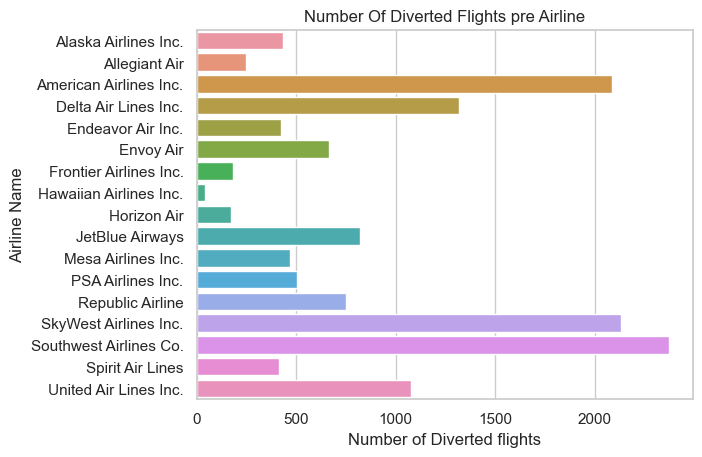

In [7]:
df3 = p1.processed_Without_Time("../data/raw/airline_data_filtered.csv")
#df3 = airlineDatajan2021Dec2021
df3 = df3.groupby('carrier_name')['arr_diverted'].sum().reset_index()
sns.set_theme(style = "whitegrid")
sns.barplot(data = df3, y = 'carrier_name',x = 'arr_diverted').set(xlabel = "Number of Diverted flights",title = "Number Of Diverted Flights pre Airline",ylabel = "Airline Name")
#plt.legend(labels, title = "Legend",bbox_to_anchor = (1,1), loc = "best")


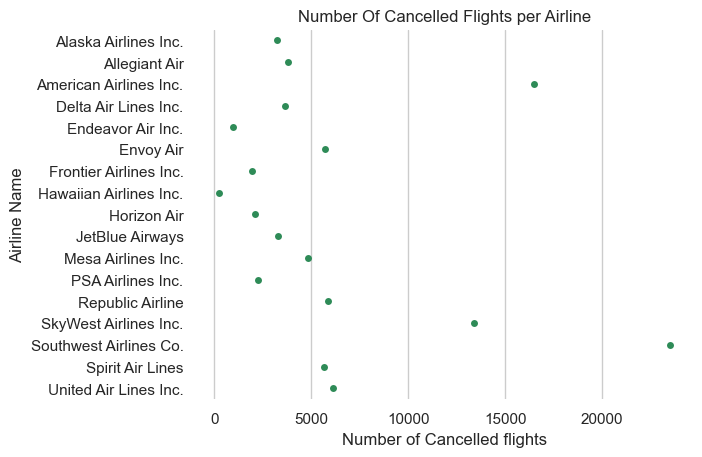

In [9]:
df4 = p1.processed_Without_Time("../data/raw/airline_data_filtered.csv")
#df4 = airlineDatajan2021Dec2021
df4 = df4.groupby('carrier_name')['arr_cancelled'].sum().reset_index()
sns.set_theme(style = "whitegrid")
#sns.set_color_codes("rocket")
sns.stripplot(data = df4, y = 'carrier_name',x = 'arr_cancelled', color = "seagreen").set(xlabel = "Number of Cancelled flights",title = "Number Of Cancelled Flights per Airline",ylabel = "Airline Name")
sns.despine(left= True, bottom = True)
labels = ['Flights', 'arr_canceled']

### So Far:
##### As it is quite difficult to just compare an airline based on their numerical data as the experience of flying with each airline is different, I found a top 3 list as all of these airlines do well.
##### The top 3 are American Airlines, United Airlines and Alaska Airlines. I would say American would rank Number 1 In this top 3 list as they have so many flights that accessibility to get to your final destination is easier, and their numbers are rather stelar based on the amount of flights they have a day


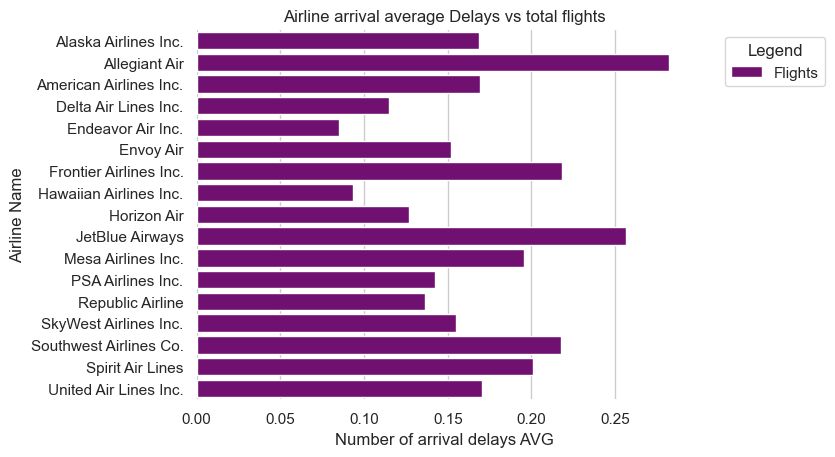

In [17]:
df5 = p1.processed_Without_Time("../data/raw/airline_data_filtered.csv")
df5 = df5.groupby(['carrier_name'])[["arr_flights","arr_del15"]].sum().reset_index()
df5["avg"] = df5["arr_del15"] / df5["arr_flights"]
sns.set_theme(style = "whitegrid")
sns.set_color_codes("pastel")
sns.barplot(data = df5, y = 'carrier_name',x = 'avg', color = "purple",errorbar=None).set(xlabel = "Number of arrival delays AVG",title = "Airline arrival average Delays vs total flights",ylabel = "Airline Name")
sns.despine(left= True, bottom = True)
labels = ['Flights', 'Delayed > 15']
plt.legend(labels, title = "Legend",bbox_to_anchor = (1.05,1), loc = "best")

##### Also, These delays are at the mercy of the Airport and Air Traffic control as if the plane is required to make a "Go Around" then the airline has no choice. Also Airport delays don't always mean that the Airline is delayed. It usually results in the airport being unorganized. Another factor is that this industry is a domino industry. When I say that I mean that one issue tends to cause a lot of issues and delays down the line. So Some of these metrics are duplicates due to this "Domino Effect"

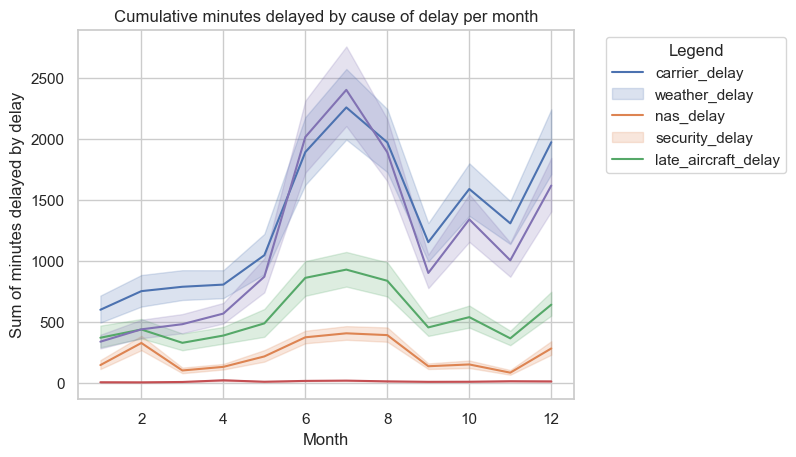

In [14]:
df8 = airlineDatajan2021Dec2021
sns.set_theme(style = "whitegrid")
sns.color_palette("muted")
sns.lineplot(data = df8, x = 'month', y = 'carrier_delay')
sns.lineplot(data = df8, x = 'month', y = 'weather_delay')
sns.lineplot(data = df8, x = 'month', y = 'nas_delay')
sns.lineplot(data = df8, x = 'month', y = 'security_delay')
sns.lineplot(data = df8, x = 'month', y = 'late_aircraft_delay').set(xlabel = "Month",title = "Cumulative minutes delayed by cause of delay per month",ylabel = "Sum of minutes delayed by delay")
labels = ['carrier_delay','weather_delay','nas_delay','security_delay', 'late_aircraft_delay']
plt.legend(labels, title = "Legend",bbox_to_anchor = (1.05,1), loc = "best")


##### Airlines that seem to have more difficulty as assumed are the budget airlines as they seem to experience the most security delays, the most over bookings. The FAA describes Security delays as such: “caused by evacuation of a terminal or concorde, reboarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minus at screening areas.” In our findings we found that 17 percent of security delays are held by Spirit airlines. Which is quite substantial; they accumulated 38737 delays per year on average. Now this delay could be at mercy of the airport and its capabilities, however due to the budget airlines usage of buses to board the planes rather than jetways these security breaches happen much more often as buying gate space for budget airlines is simply not in their business model

### Conclustion:
##### If you were to base your decision on just efficiency and getting from point A to point B with flight availability your best choice would be to pick American Airlines, United Airlines or Alaska Airlines. However American Airlines is the best for flight availability and flight networks as their flight availability and routes are much more than other airlines. Due to American's large fleet and their consistent track record they are the best performing airline, following suit is United and Alaska Airlines. Air Carriers to avoid are the budget airlines like Spirit airlines and Southwest due to the nature of their business model it forces large hiccups further down the road for the airline. 
